In [56]:
import numpy as np
import pandas as pd 
import os
import seaborn as sns
from matplotlib import pyplot as plt

In [57]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/indian-liver-patient-records/indian_liver_patient.csv


## EDA

In [58]:
df=pd.read_csv('/kaggle/input/indian-liver-patient-records/indian_liver_patient.csv')

In [59]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [60]:
df.shape

(583, 11)

In [61]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


## We'll see how gender affects having or not having this disease

In [62]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

### Albumin_and_Globulin_Ratio column contains null values so dropping them as there are only 4 of them

In [63]:
df.dropna(inplace=True)

In [64]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [65]:
def getGen(gender):
    if (gender=='Male'):
        return 0
    else:
        return 1

df['Sex']=df['Gender'].apply(getGen)
df.drop('Gender',axis=1,inplace=True)

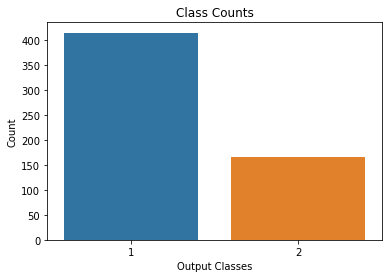

In [66]:
outputDistribution=df['Dataset'].value_counts()
sns.barplot(outputDistribution.index,outputDistribution.values)
plt.ylabel('Count')
plt.xlabel('Output Classes')
plt.title('Class Counts')
plt.show()

## Machine Learning

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [68]:
Y=df['Dataset']
df.drop('Dataset',axis=1,inplace=True)
X=df.values

In [69]:
X.shape,Y.shape

((579, 10), (579,))

In [70]:
xTrain,xTest,yTrain,yTest=train_test_split(X,Y)

In [71]:
lr_clf=LogisticRegression(max_iter=500)

In [72]:
lr_clf.fit(xTrain,yTrain)

LogisticRegression(max_iter=1000)

In [73]:
testScore=lr_clf.score(xTest,yTest)
trainScore=lr_clf.score(xTrain,yTrain)

In [74]:
print ("train score:",trainScore)
print ("test score:",testScore)

train score: 0.7304147465437788
test score: 0.696551724137931
